In [77]:
# Imports
import csv
import matplotlib.pyplot as plt
import math

In [78]:
### Changeable Variables

In [79]:
# File Names
spec_file_early = 'rx_spectrum_early.csv'
spec_file_late = 'rx_spectrum_late.csv'
xs_file = 'cevns_xs_rx.csv'

# Detector Variables = 1 kg Zinc Superconductor in a cube
det_num = 10
det_mass = 1000    #grams
det_density = 7.14   #g/cm^3
det_amu = 72
A = 64*0.486 + 66*0.279 + 67*0.041 + 68*0.188

# Other Variables
distance = 1000    #m
N_A = 6.0221408*10**(23)  #atoms/mole
t = 86400

In [80]:
### Download Data

In [81]:
# Read Spectrum CSV File
energies = []
counts_early = []
counts_late = []

with open(spec_file_early) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0]))
        counts_early.append(float(row[1]))

with open(spec_file_late) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        counts_late.append(float(row[1]))

In [82]:
# Read XS csv file
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        xs.append(float(row[1]))

In [83]:
### Calculating Interaction Probability

In [84]:
int_prob = []

for i in range(len(energies)) :
    P = 1
    R = det_num*xs[i]*10**(-4)*N_A*det_mass*P/(A*4*math.pi*distance**2)
    int_prob.append(R)

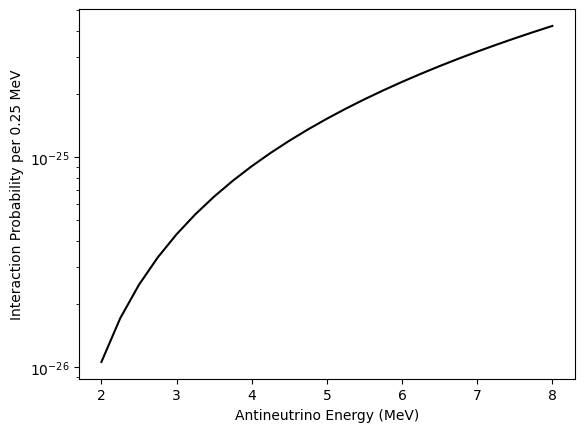

In [85]:
# Plot
plt.plot(energies, reaction_rate, color='black')
plt.xlabel('Antineutrino Energy (MeV)')
plt.ylabel('Interaction Probability per 0.25 MeV')
plt.yscale('log')
plt.savefig('rx_RR.png')

In [86]:
### Calculating Reaction Rate

In [87]:
rate_spec_early = []
rate_spec_late = []

for i in range(len(energies)) :
    x = reaction_rate[i]*counts_early[i]
    rate_spec_early.append(x*t)
    
    x = reaction_rate[i]*counts_late[i]
    rate_spec_late.append(x*t)

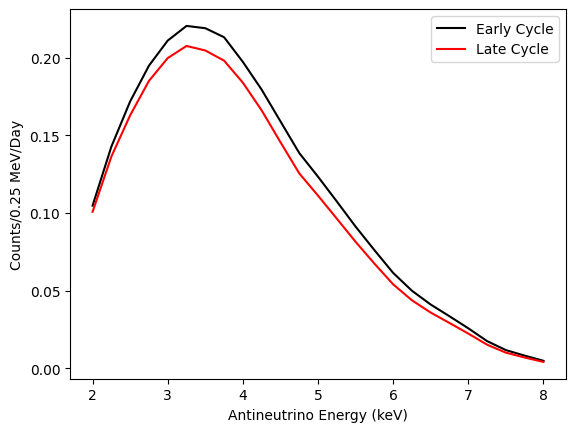

In [88]:
# Graphing reaction rate
plt.plot(energies, rate_spec_early, color='black', label='Early Cycle')
plt.plot(energies, rate_spec_late, color='red', label='Late Cycle')
plt.xlabel('Antineutrino Energy (keV)')
plt.ylabel('Counts/0.25 MeV/Day')
plt.legend()
plt.savefig('rx_counts.png')

In [89]:
print(sum(rate_spec_early))
print(sum(rate_spec_late))

2.802805681310094
2.592869931072835
